In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

e0 = 611.0
L0 = 2.5e6
Rv = 461.0
T0 = 273.15
Rd = 287.0
psurf = 1e5
g = 9.8
Cp = 1004
Cpv = 1859

def pres(z, T):
    return psurf * np.exp((-g * z) / (Rd * T))

def q_sat(z, T):
    psat = e0 * np.exp(-L0/Rv * (1 / T - 1/T0))
    return Rd/Rv * psat / (pres(z,T) - psat)

def Γm(Tsurf):
    qv = 0.8 * q_sat(0.0, Tsurf)
    rv = qv / (1-qv)
    Γd = g / Cp
    Γus = Γd * (1 + rv) / (1 + rv*Cpv/Cp)
    Γs = Γd * (1 + (L0*rv)/(Rd*Tsurf)) / (1 + (L0**2*rv)/(Rv*Cp*Tsurf**2))
    return Γs

def Tatmos(qft):
    return 375 + 2.8*np.log(co2) + 21.1*np.log(qft)
    # return 270 + 10*np.log(co2) + 10*np.log(qft)

co2 = np.array([200,300,400,800,1000,1200,1300,1400,1600,200,300,400,800,1000,1200,1300,1400])
cf = np.array([1.00,1.00,1.00,1.00,1.00,0.99,0.25,0.22,0.19,1.00,0.46,0.42,0.32,0.30,0.26,0.24,0.22])
Tct = np.array([283.0,285.3,287.1,290.9,292.2,293.5,303.7,305.4,308.2,283.0,291.4,293.6,298.6,300.3,302.7,303.9,305.8])
sst_T = np.array([296.7,298.4,299.8,303.4,304.9,306.2,314.8,316.8,319.8,296.7,302.8,304.5,309.2,311.0,313.7,315.1,317.3])
sst_S = np.array([287.7,289.1,290.0,292.2,293.2,294.3,304.5,305.8,308.0,287.6,296.8,297.9,300.9,302.0,303.7,304.7,306.2])
zi = np.array([1442,1349,1266,1078,1011,972,834,781,703,1416,1340,1230,1013,949,866,826,766])
Teff = np.array([256.7,260.5,263.4,270.3,272.9,275.2,289.0,292.2,297.2,256.9,267.5,271.0,279.5,282.7,287.1,289.5,293.0])

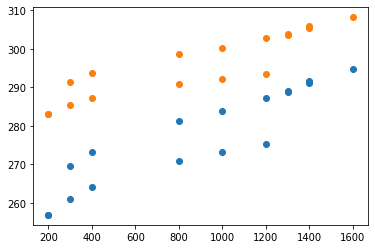

[-7.92290266  2.51045109  4.96539901]


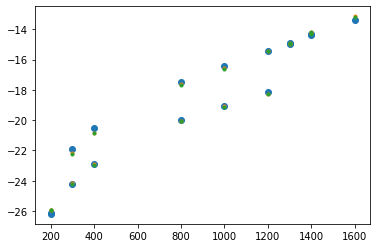

In [41]:
gamma = Γm(sst_T)
Tft = sst_T - gamma*(zi+200)
qct = 0.2 * q_sat(zi, Tct)
qft = 0.2 * q_sat(zi, Tft)

plt.plot(co2, Tatmos(qct), 'o')
plt.plot(co2, Tct, 'o')
plt.show()

def dTa(x, a, b, c):
    return a + b*np.log(x[0,:]) + c*np.log(x[1,:])

p0 = [-6, 2.2, 5]
x = np.vstack((co2, qct))
y = Tatmos(qct) - Tct
p1, pcov = curve_fit(dTa, x, y, p0)
print(p1)

plt.plot(x[0,:], y, 'o')
plt.plot(x[0,:], dTa(x, p1[0], p1[1], p1[2]), '.')
plt.plot(x[0,:], dTa(x, -7.92, 2.51, 4.97), '.')
plt.show()

In [1]:
gamma = Γm(sst_T)
Tft = sst_T - gamma*(zi+200)

gamma_inf = (sst_T - Tct) / (zi+200)
print(gamma)
print(gamma_inf)

plt.plot(sst_T, Tct, 'o', label="cloud-top temp diag from LES")
plt.plot(sst_T, Tft, 'o', label="FT temp diag from tropical col")
plt.xlabel("tropical SST (K)")
plt.ylabel("above-cloud T (K)")
plt.grid()
plt.legend()
plt.show()

qct = 0.2 * q_sat(zi, Tct)
qft = 0.2 * q_sat(zi, Tft)
plt.plot(sst_T, qct*1e3, 'o', label="cloud-top q diag from LES")
plt.plot(sst_T, qft*1e3, 'o', label="FT q diag from tropical col")
plt.xlabel("tropical SST (K)")
plt.ylabel("above-cloud q (g/kg)")
plt.yscale('log')
plt.yticks([2,3,4,6,8,16],[2,3,4,6,8,16])
plt.grid()
plt.legend()
plt.show()

plt.plot(sst_T, Tatmos(qct), 'o', label="Teff from qct")
#plt.plot(sst_T, Tatmos(qft), 'o', label="Teff from qft")
plt.plot(sst_T, Teff, 'o', label="Teff")
plt.xlabel("tropical SST (K)")
plt.ylabel("Teff (K)")
plt.grid()
plt.legend()
plt.show()

NameError: name 'Γm' is not defined